# 1.python中的整型长数字的技巧

In [1]:
# python中的整型的技巧,可以使长数字更可读
a = 123_456_789
b = 1_000

print(a+b)
result = a + b
print(f'{result:,}')
print(f'{result:_}')


123457789
123,457,789
123_457_789


# 2.对未实现的函数进行占位的技巧

In [2]:
# 对未实现的函数进行占位的技巧
def fun1():
    pass
def fun2():
    ...

fun1()
fun2()
# 但是这样的方法在我们构建一个大的程序,忘记实现这个函数的时候,程序报错的原因可能不明显
# 所以我们可以使用raise NotImplementedError来提醒我们
def fun3():
    raise NotImplementedError('快加班=。=')
fun3()

NotImplementedError: 快加班=。=

# 3.海象运算符
Python3.8引入的赋值运算符,可用于表达式内部对变量进行赋值,在go语言中也有用到

In [ ]:
# there is a example about why we use it
number = [1,10,9,6,7,3,6]
info = {
    "lenth":len(number),
    "sum":sum(number),
    "mean":sum(number)/len(number),
}
print(info)

{'lenth': 7, 'sum': 42, 'mean': 6.0}


In [ ]:
# as we can find that we calculate twice the length of the list,maybe it does'nt matter in this case but in a large list it will be a waste of resources
# we chould optimize it 
number = [1,10,9,6,7,3,6]
length_number = len(number)
sum_number = sum(number)
info = {
    "lenth":length_number,
    "sum":sum_number,
    "mean":sum_number/length_number,
}
print(info)

{'lenth': 7, 'sum': 42, 'mean': 6.0}


In [ ]:
# this code can be more efficient as we use := operator to assign the value to the variable
number = [1,10,9,6,7,3,6]
info = {
    "lenth":(length_number := len(number)),
    "sum":(sum_number := sum(number)),
    "mean":sum_number/length_number,
}
print(info)

{'lenth': 7, 'sum': 42, 'mean': 6.0}


In [ ]:
# sometimes , we can simplify our loop with := operator
n = 0
while (n < 5):
    n_squared = n **2
    print(n_squared)
    n += 1

0
1
4
9
16


In [ ]:
# sometimes , we can simplify our loop with := operator
n = 0
while (n_squared := n **2) < 25:
    
    print(n_squared)
    n += 1

0
1
4
9
16


# 4.dataclass

In [ ]:
class Person:
    def __init__(self,name:str,age:int):
        self.name: str = name 
        self.age: int = age

    def __repr__(self):
        return f"Person(name={self.name},age={self.age})"
    
    def __eq__(self,other:object) -> bool:
        return self.name == other.name and self.age == other.age

if __name__ == '__main__':
    person1 = Person('xiao ming',18)
    print(person1)
    person2 = Person( 'xiao ming',18)
    print(person1 == person2)

Person(name=xiao ming,age=18)
True


In [ ]:
# we can simplify the  code with dataclasses
from dataclasses import dataclass

@dataclass 
class Person:
    name:str
    age:int

if __name__ == '__main__':
    person1 = Person('xiao ming',18)
    print(person1)
    person2 = Person( 'xiao ming',18)
    print(person1 == person2)

Person(name='xiao ming', age=18)
True


# 5.格式化输出技巧

In [6]:
text = 'hello'
print(f'{text}')
print(f'{text:#<15}')
print(f'{text:#>15}')
print(f'{text:#^15}')

hello
hello##########
##########hello
#####hello#####


# 6.max函数的高阶用法
max函数用于获取list中出现最多的元素

In [9]:
nums = [3,3,5,6,5,6,3,2,1]
most = max(nums,key=nums.count)

print(most)

# we can optimize the code with tuple
# as we use tuple,the element of the list can be decreased,for example
most = max(set(nums),key=nums.count)
print(most)


3
3


# 7.if __name__ = '__main__':的用法

- __name__:每次在我们执行代码之前,python解释器会读取源文件,并自动定义一些全局变量


In [1]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'open', 'quit']


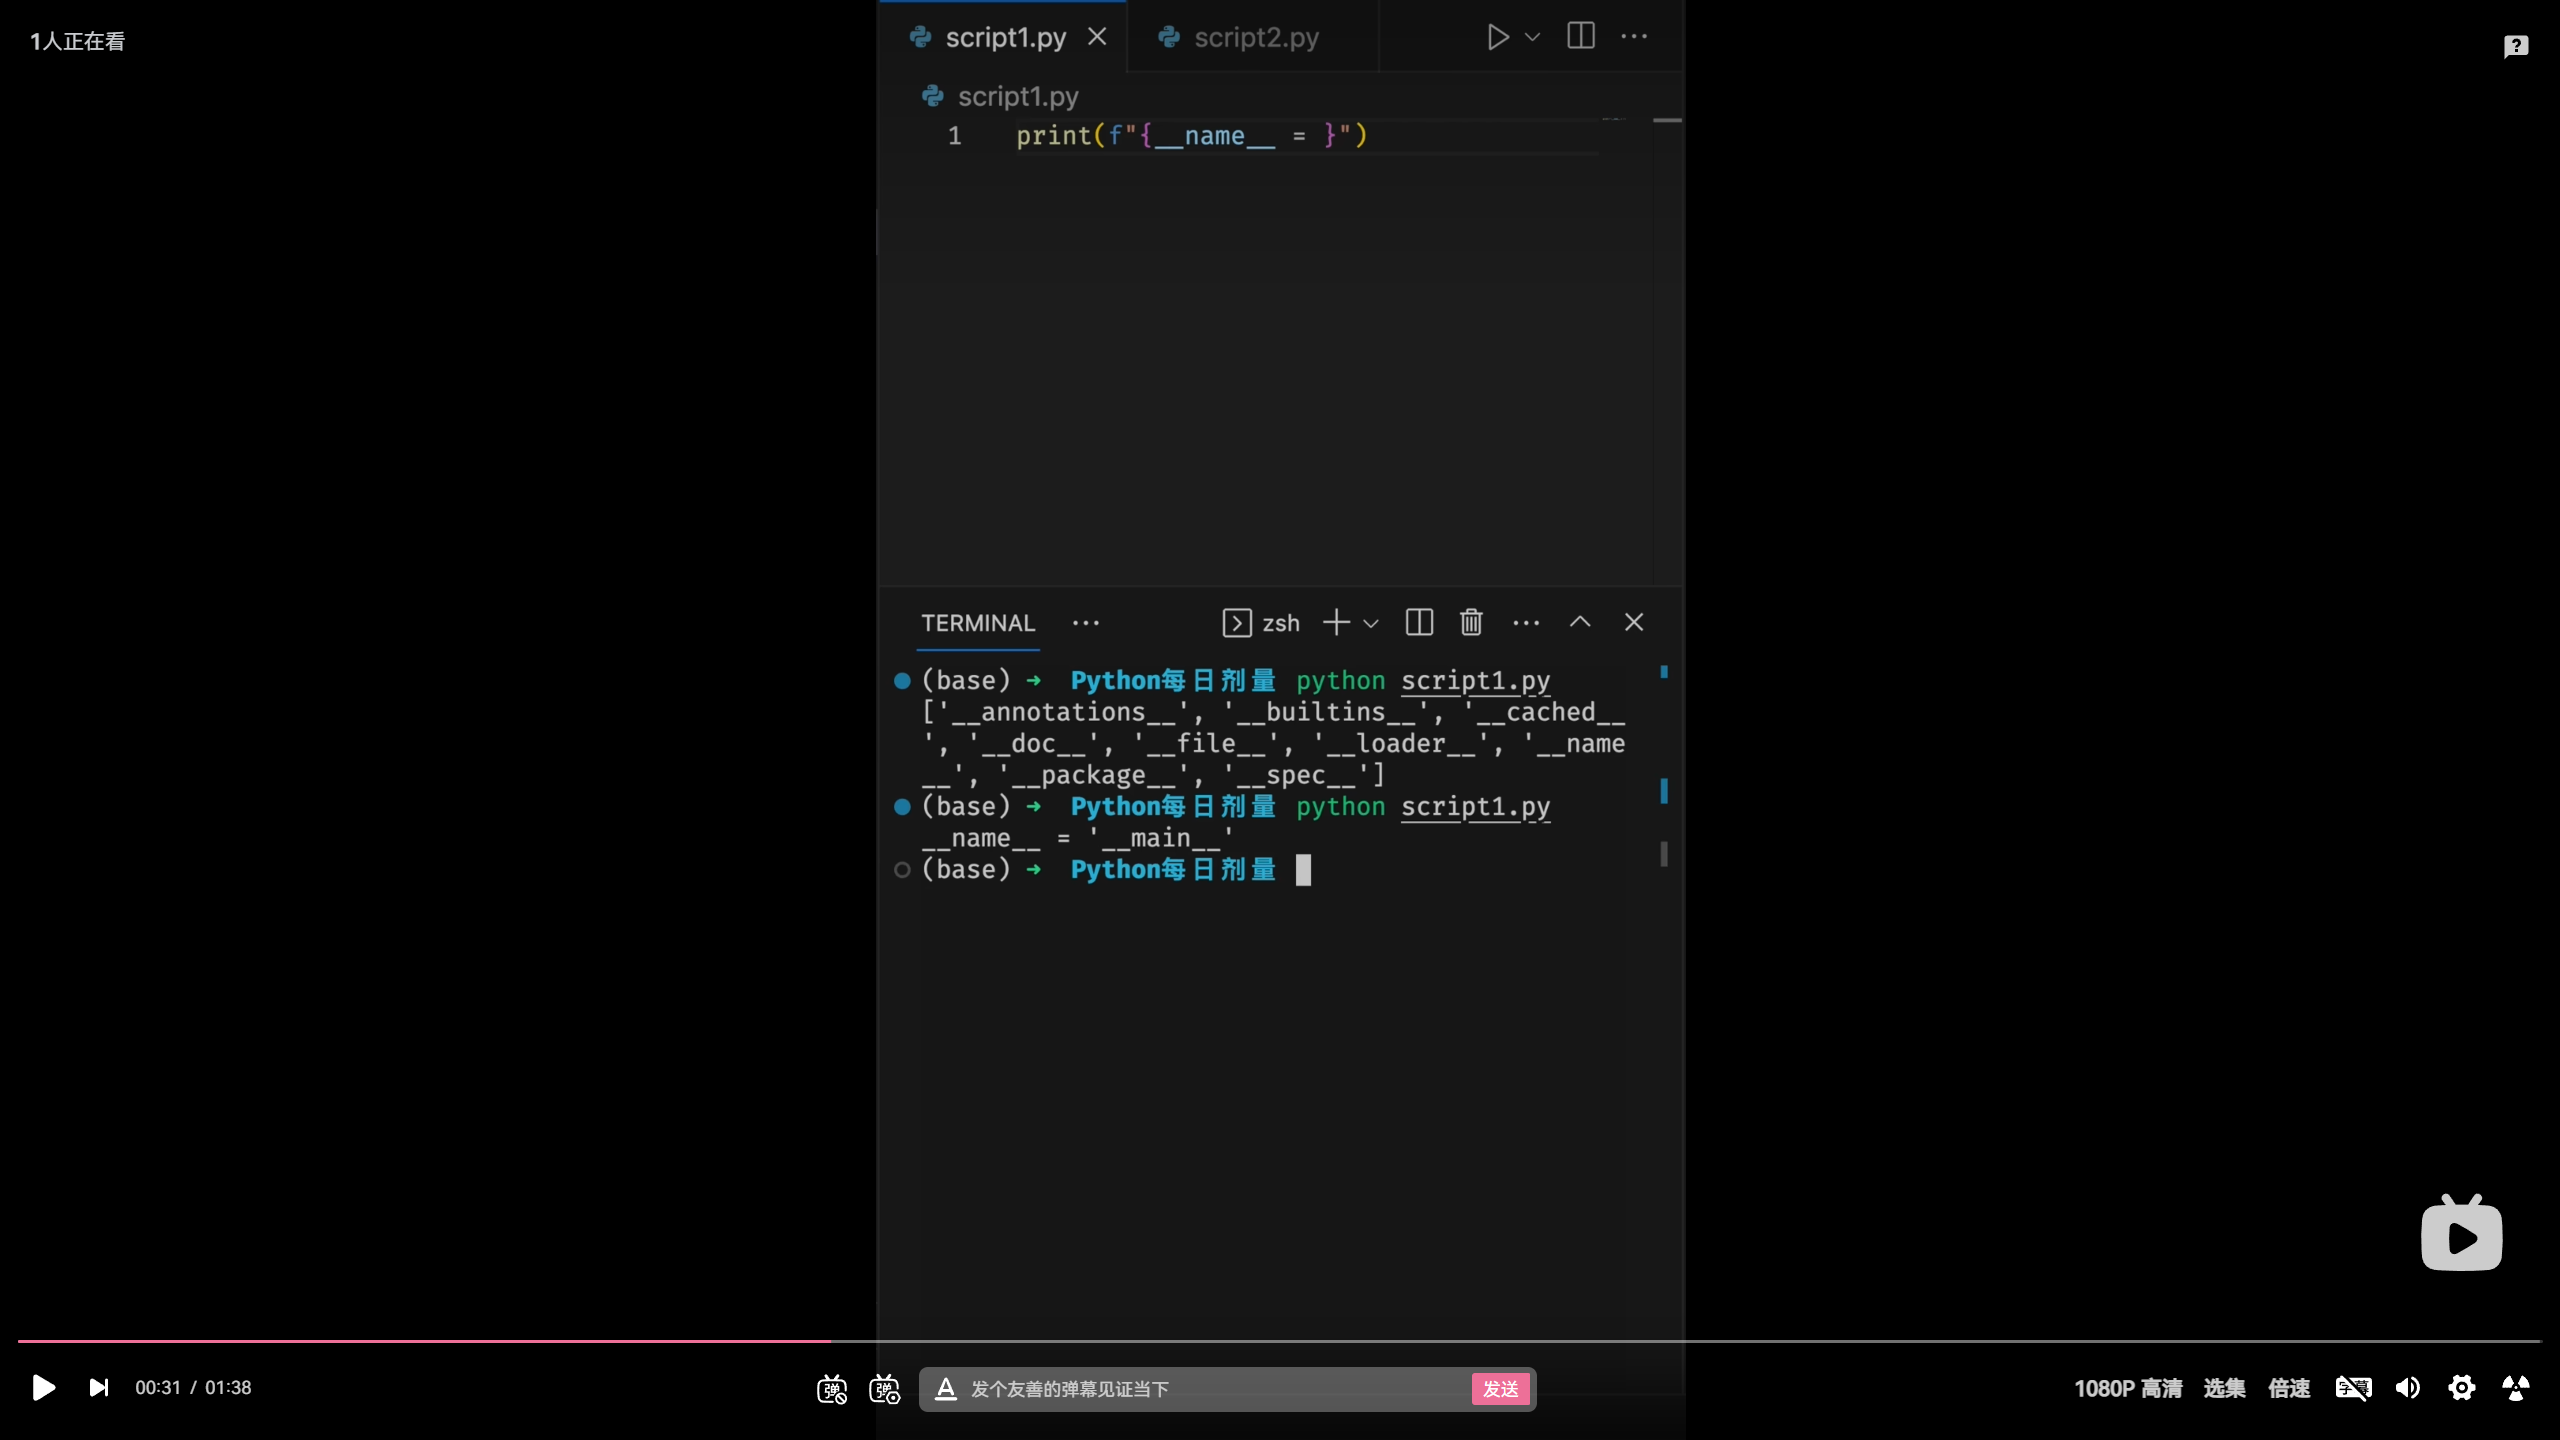
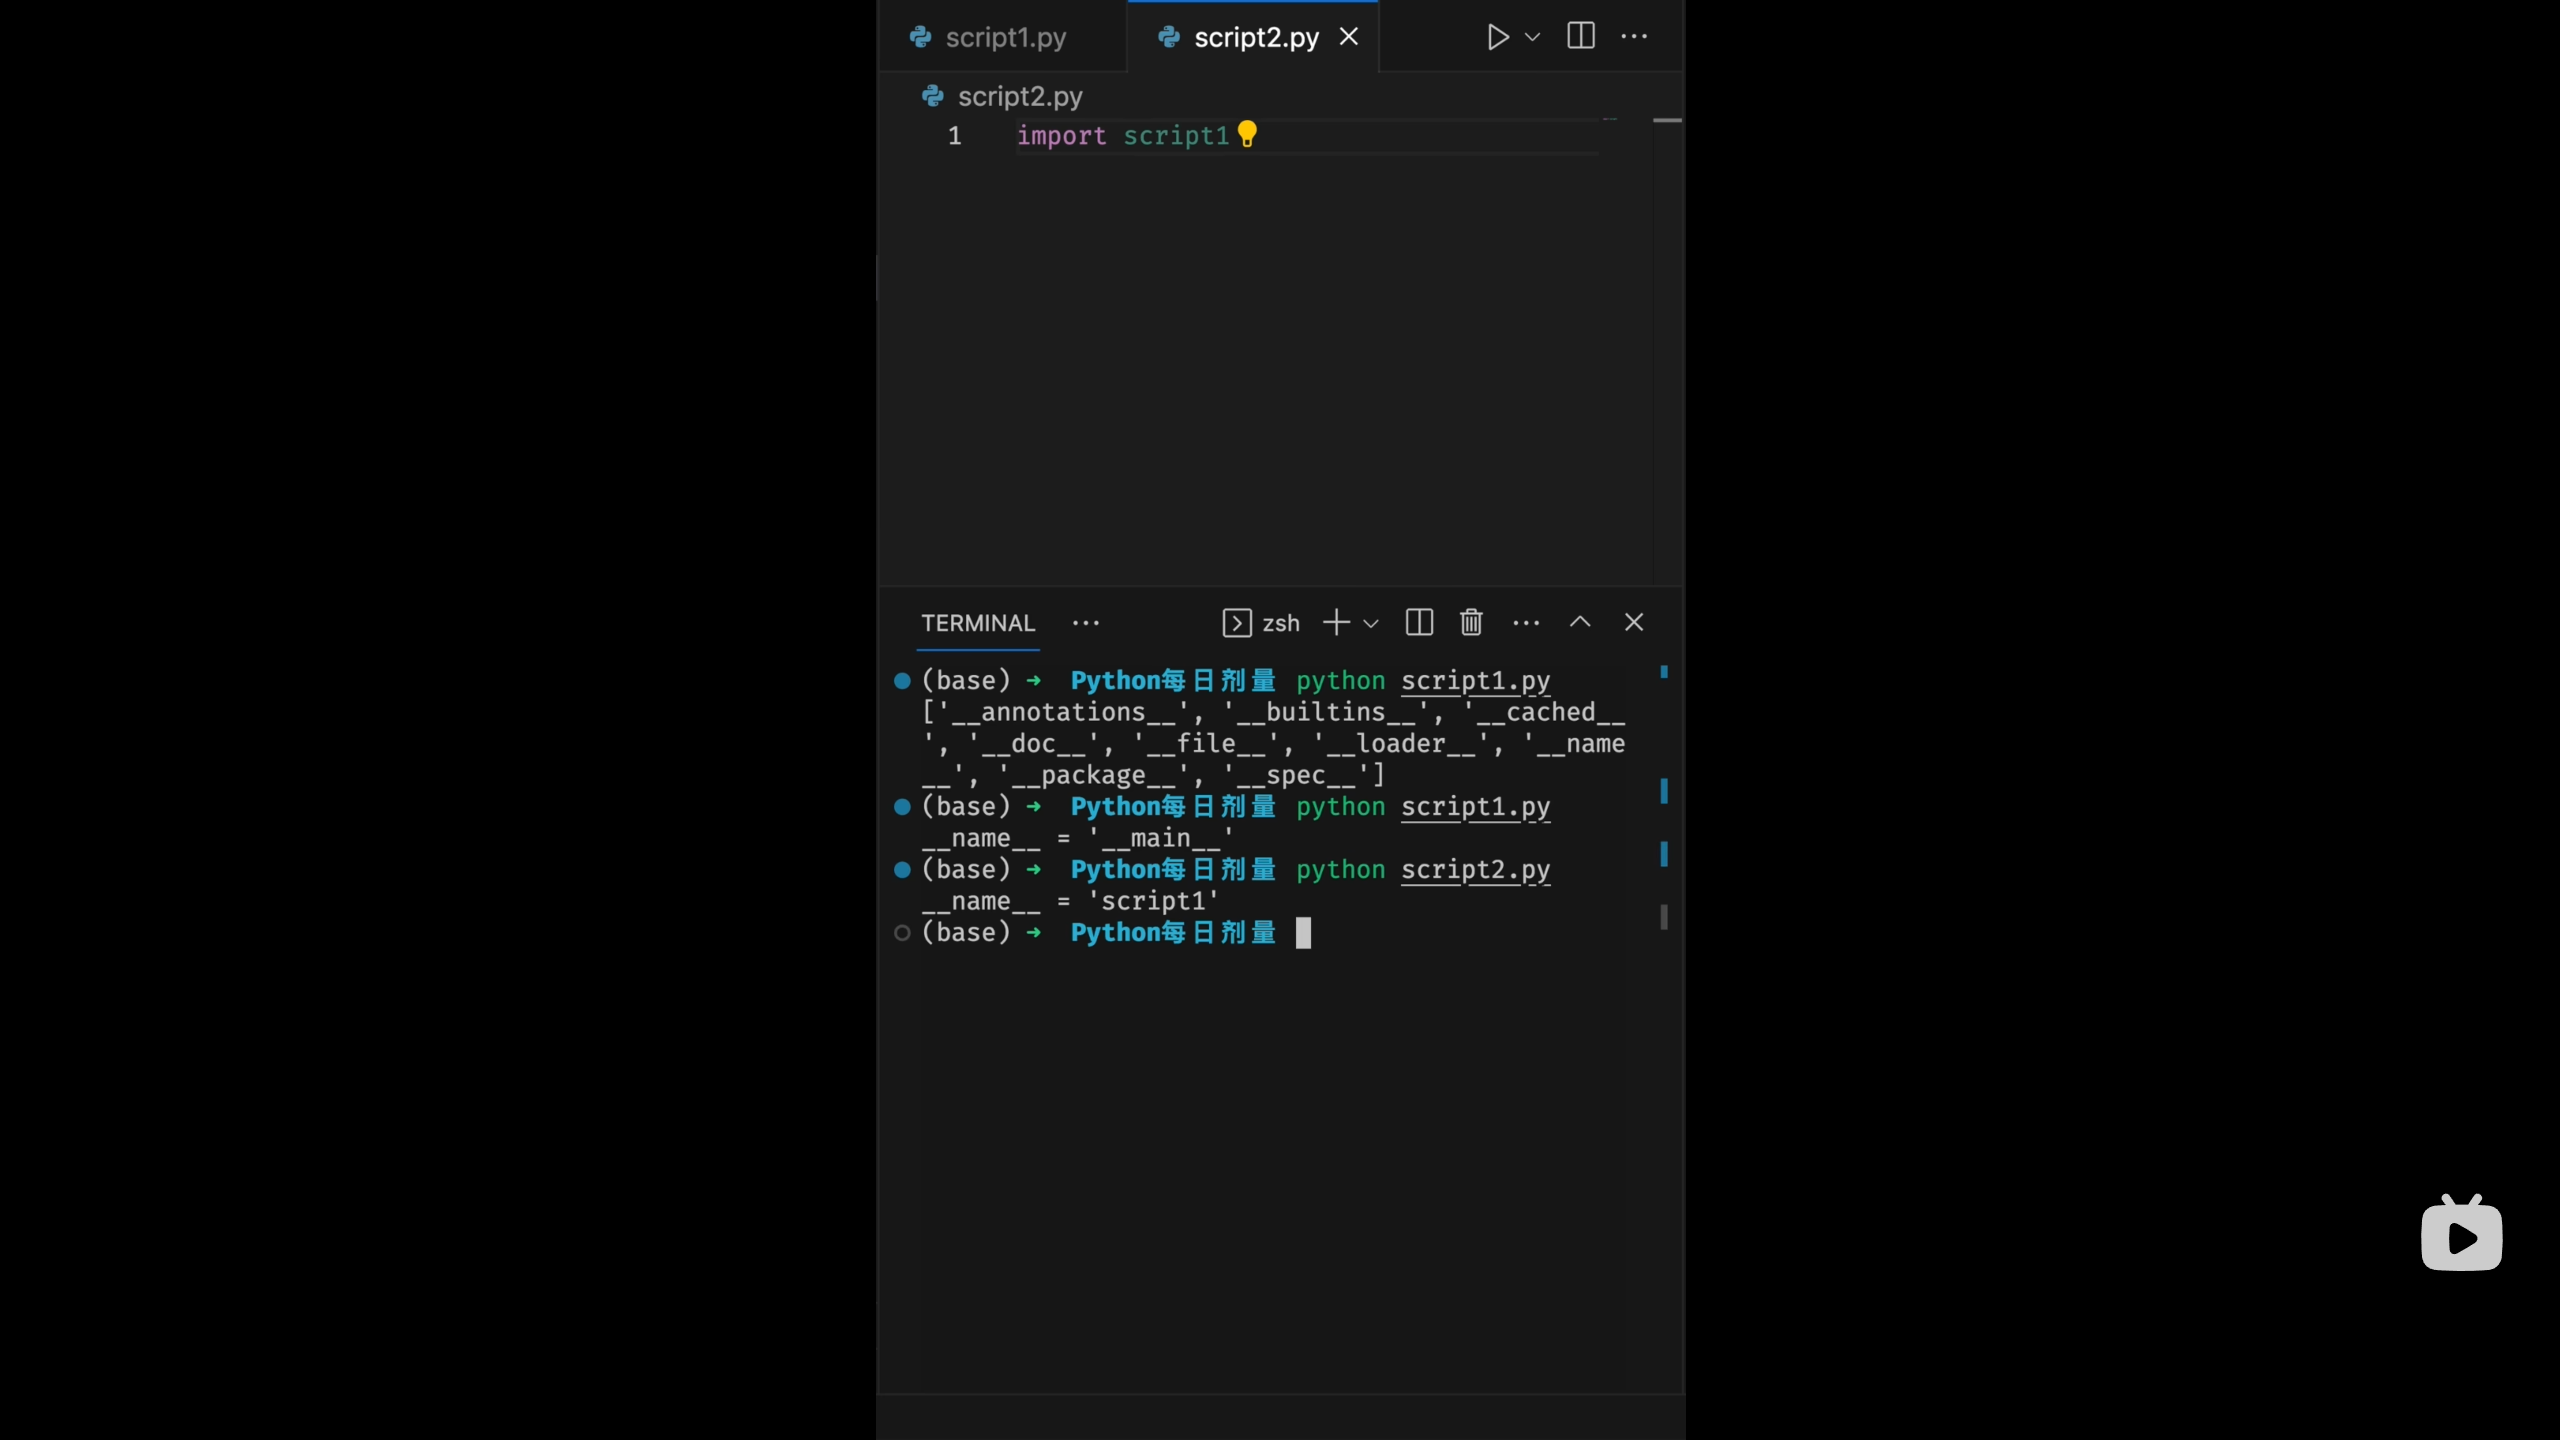
## 对于文件中的script1和script2文件
会出现script2文件运行也出现script1的文件
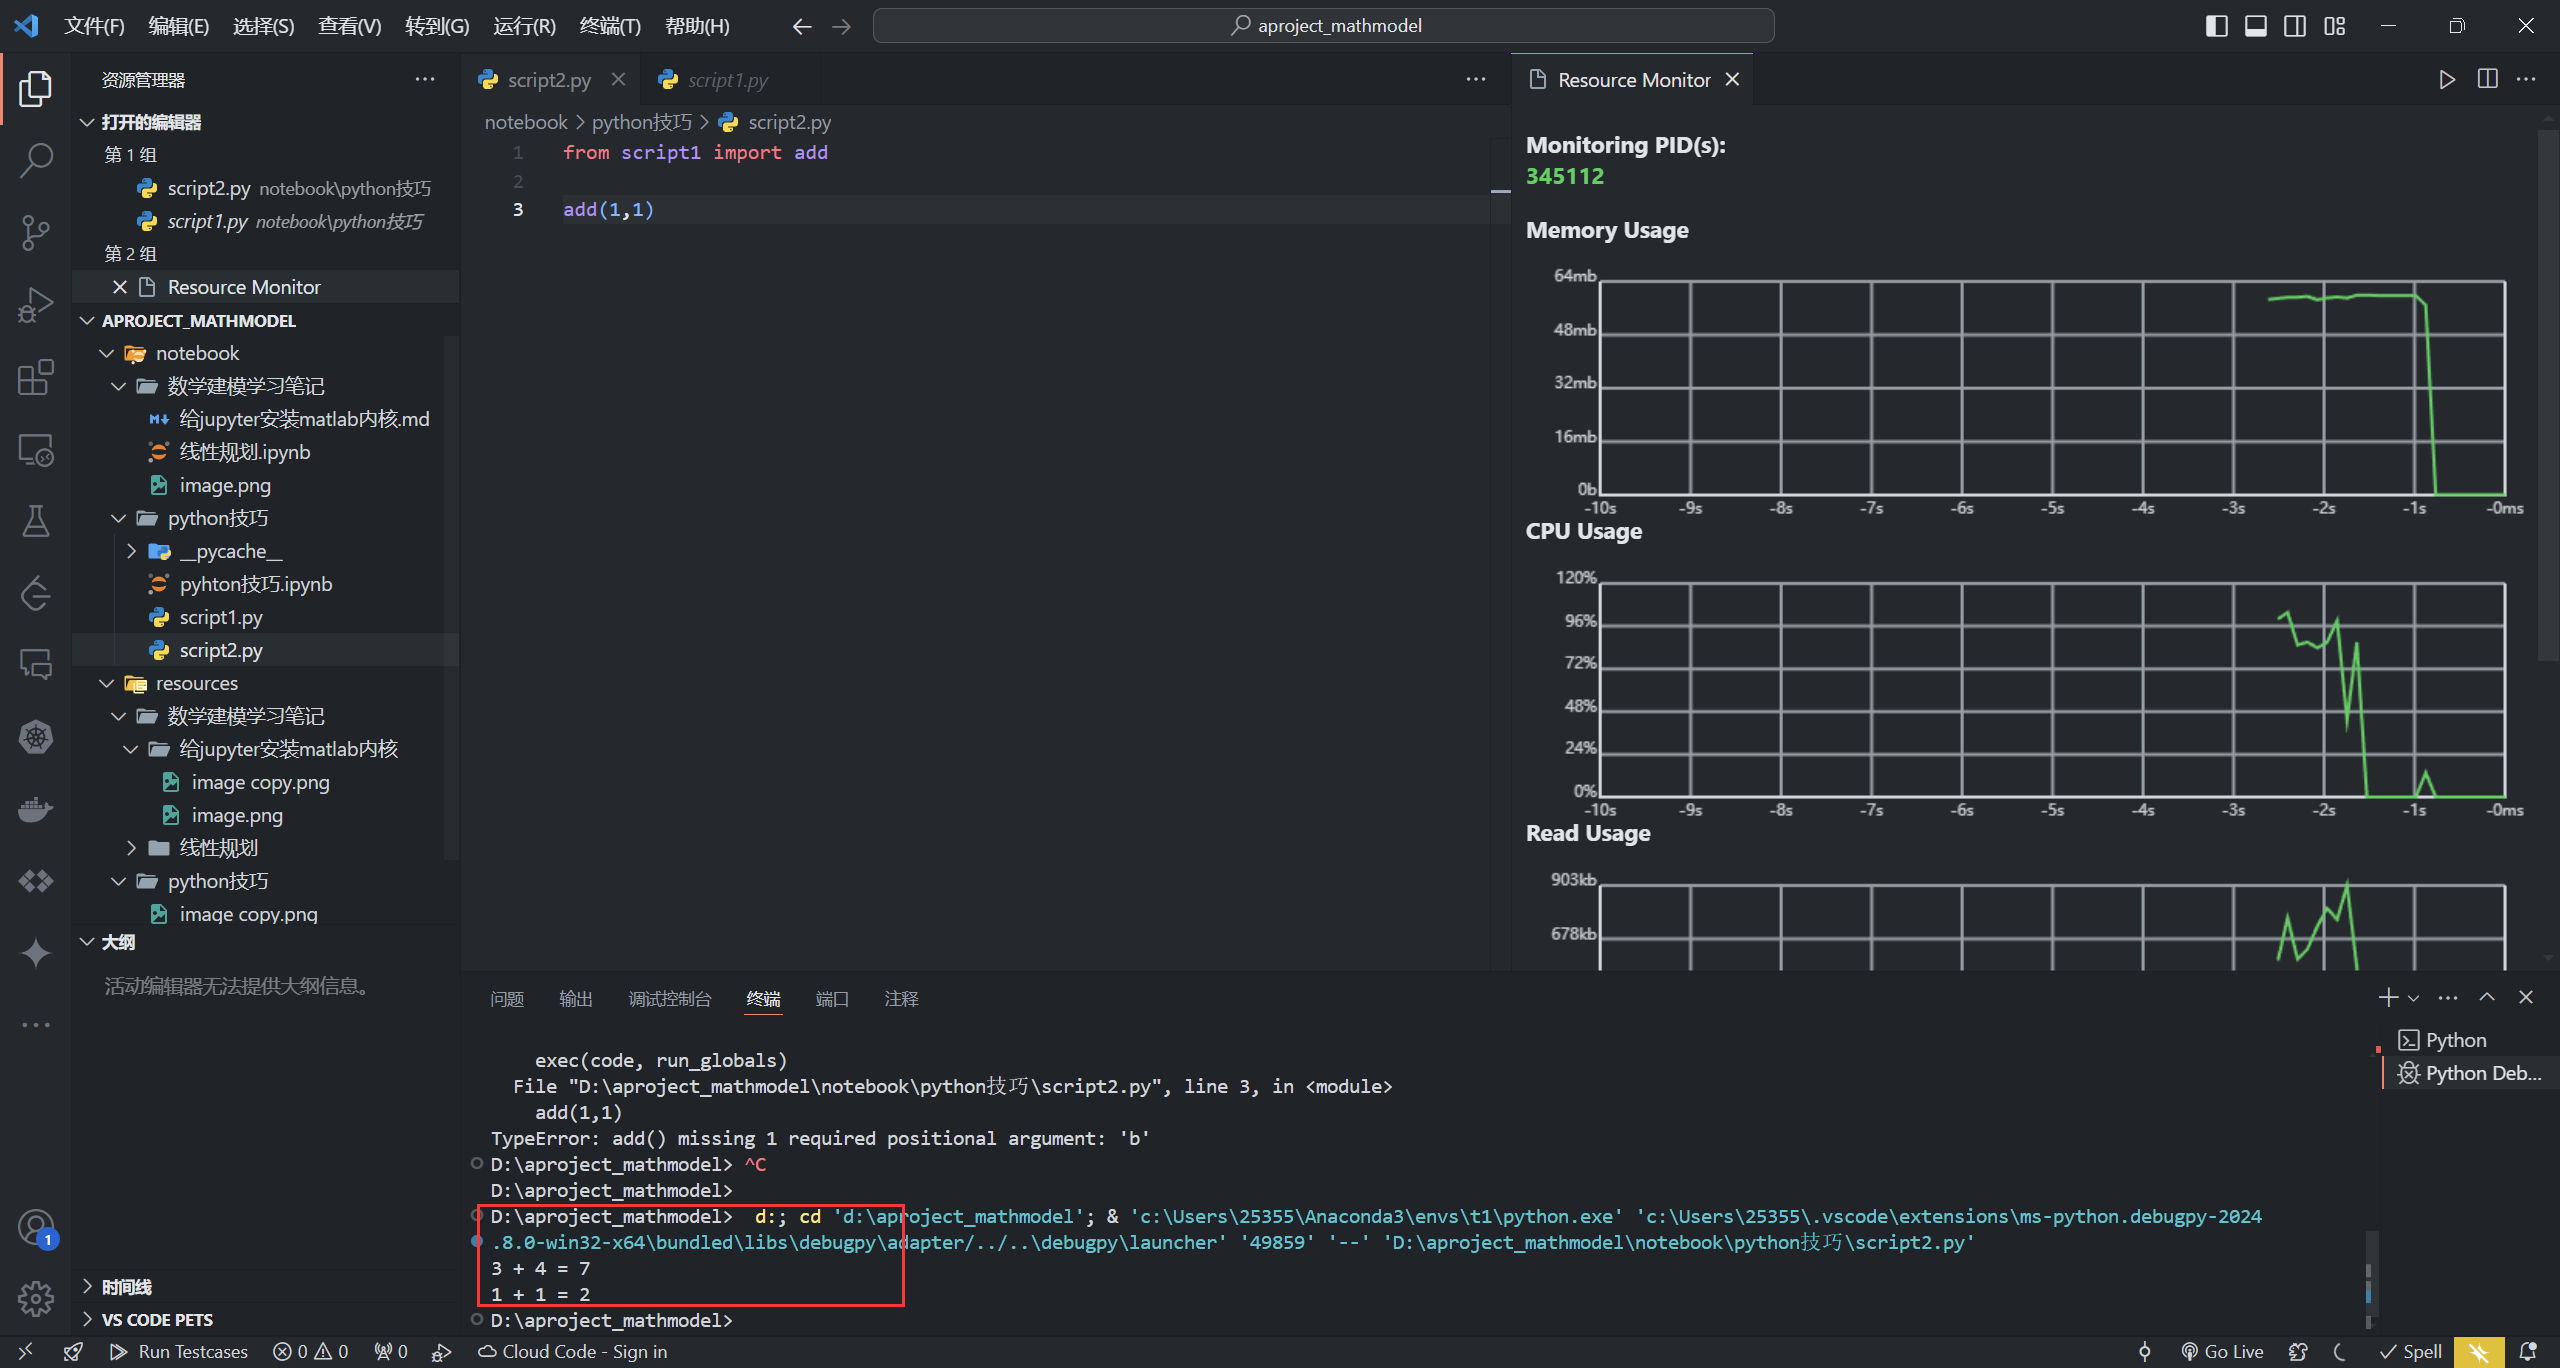
要解决这一问题,我们可以在script1文件中添加
```python
if __name__ == '__main__':
```

# 8.字典get()方法 | 更好获取字典中值的方法
除了直接访问字典中key()值的方法,来获取需要的值之外,还可以使用get()方法


In [2]:
students = {
    'zhangsan': '123',
    'xiaoming': '456',
    'lihua': '789'
}
print(students['xiaoming'])

456


In [4]:
print(students.get('lisi'))

None


In [5]:
print(students.get('lisi','there is no lisi in the students'))

there is no lisi in the students


# 9.将函数作为值放入字典中

In [8]:
# those functions just output the functions' name
def func1():
    print(func1.__name__)

def func2():
    print(func2.__name__)

def default():
    print(default.__name__)

# define the int num
# if num == 1,call func1
# if num == 2,call func2
# else call default

# of course we can use if else to solve this problem
num:int = 2
if num == 1:
    func1()
elif num == 2:
    func2() 
else:
    default()

# but we can use dict to solve this problem
func_dict = {
    1:func1,
    2:func2,
}

calling = func_dict.get(num,default)
calling()

func2
func2


# 10.生成器Generator 

In [9]:
def square_numbers(nums:list[int]):
    square_nums = []
    for i in nums:
        square_nums.append(i**2)
    return square_nums

nums = [1,2,3,4,5]
square_nums = square_numbers(nums)
print(square_nums)

[1, 4, 9, 16, 25]


In [18]:
# how can we switch the function to generator?
# the key point is to use yield,we don't need to save the result after operation to the square_nums
def square_numbers(nums:list[int]):
    for i in nums:
        yield i**2
square_nums = square_numbers(nums)
print(square_nums)

<generator object square_numbers at 0x000001E2391F0270>


In [19]:
# the generator will return the result with user's need,doesn't generate all the result at once
# which can save the memory
print(next(square_nums))
print(next(square_nums))
print(next(square_nums))
print(next(square_nums))
print(next(square_nums))

1
4
9
16
25


In [20]:
# if we print again,it will return stopiteration error
# which means the generator has no more result to return
print(next(square_nums))

StopIteration: 

In [21]:
# expert using next function,we usually consider generator as a iterable object
# so we can use for loop to get the result
# how can we switch the function to generator?
# the key point is to use yield,we don't need to save the result after operation to the square_nums
def square_numbers(nums:list[int]):
    for i in nums:
        yield i**2
square_nums = square_numbers(nums)
for num in square_nums:
    print(num)

1
4
9
16
25


In [22]:
# we can also use list() to convert the generator to list
# but it will lose the meaning of using generator to save the memory
square_nums = list(square_numbers(nums))
print(square_nums)


[1, 4, 9, 16, 25]


## 列表推导式简化代码

In [24]:
# we can use list comprehension to simplify the code 
square_nums =  [i**2 for i in nums]
print(square_nums)
for num in square_nums:
    print(num)

[1, 4, 9, 16, 25]
1
4
9
16
25


In [25]:
# just switch the [] to ()
# we can get the generator comprehension
# we can use list comprehension to simplify the code 
square_nums =  (i**2 for i in nums)
print(square_nums)
for num in square_nums:
    print(num)

<generator object <genexpr> at 0x000001E239265770>
1
4
9
16
25
